In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score, recall_score, roc_curve, roc_auc_score,f1_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('credit_card.csv')

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TRGT1
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TRGT1
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
data.isna()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TRGT1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Text(0.5,1,'Credit Card Default Counts')

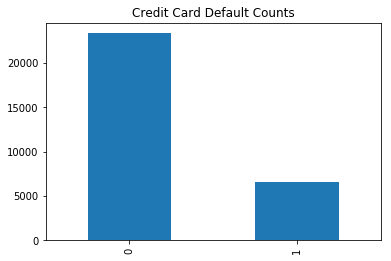

In [6]:
pd.value_counts(data['TRGT1']).plot.bar()
plt.title("Credit Card Default Counts")

In [7]:
print ("Gender: ")
print(data['SEX'].value_counts()) 
print('NANs found: ', sum(data['SEX']==0))

Gender: 
2    18112
1    11888
Name: SEX, dtype: int64
NANs found:  0


In [8]:
print('EDUCATION')
print(data['EDUCATION'].value_counts())
print('NANs found:', sum(data['EDUCATION']==0) )

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
NANs found: 14


In [9]:
print('MARRIAGE')
print(data['MARRIAGE'].value_counts())
print('NANs found:', sum(data['MARRIAGE']==0) )

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
NANs found: 54


29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
Name: AGE, dtype: int64
NANs found: 0


Text(0.5,1,'Age Distribution')

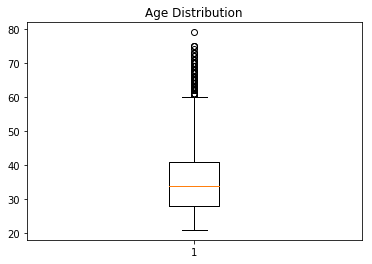

In [10]:
print(data['AGE'].value_counts().nlargest(10))
print('NANs found:', sum(data['AGE']==0)) 
plt.boxplot(data['AGE']) 
plt.title("Age Distribution")

0        5249
2000     1363
3000      891
5000      698
1500      507
4000      426
10000     401
Name: PAY_AMT1, dtype: int64


C:\Users\arnab saha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\arnab saha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


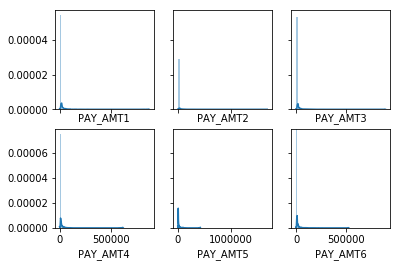

In [11]:
print(data['PAY_AMT1'].value_counts().nlargest(7))
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
sns.distplot(data['PAY_AMT1'], ax=ax[0,0])
sns.distplot(data['PAY_AMT2'], ax=ax[0,1])
sns.distplot(data['PAY_AMT3'], ax=ax[0,2])
sns.distplot(data['PAY_AMT4'], ax=ax[1,0])
sns.distplot(data['PAY_AMT5'], ax=ax[1,1])
sns.distplot(data['PAY_AMT6'], ax=ax[1,2])

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


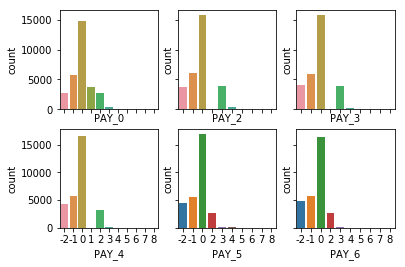

In [12]:
print(data['PAY_0'].value_counts())
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
sns.countplot(x="PAY_0", data=data, ax=ax[0,0])
sns.countplot(x="PAY_2", data=data, ax=ax[0,1])
sns.countplot(x="PAY_3", data=data, ax=ax[0,2])
sns.countplot(x="PAY_4", data=data, ax=ax[1,0])
sns.countplot(x="PAY_5", data=data, ax=ax[1,1])
sns.countplot(x="PAY_6", data=data, ax=ax[1,2])

In [13]:
"""sns.violinplot(x="TRGT1", y="AGE", hue="SEX", data=data, split=True)
plt.title("Distribution of Default by Sex and Age")"""

'sns.violinplot(x="TRGT1", y="AGE", hue="SEX", data=data, split=True)\nplt.title("Distribution of Default by Sex and Age")'

In [14]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
TRGT1        30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [16]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TRGT1
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [17]:
data.columns
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
TRGT1        0
dtype: int64

In [18]:
data = data.rename(columns={'TRGT1': 'score','PAY_0': 'PAY_1'})
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,score
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Text(0,0.5,'COUNT')

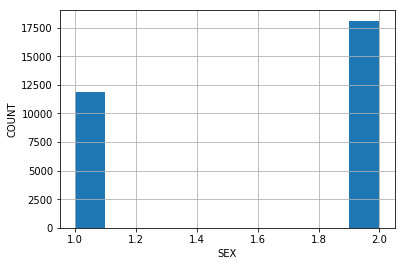

In [19]:
data['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')

Text(0,0.5,'COUNT')

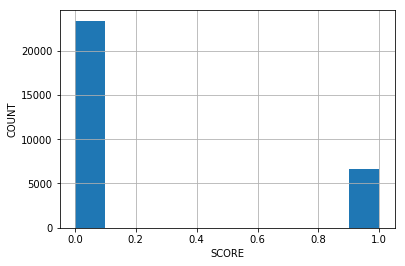

In [20]:
data['score'].hist()
plt.xlabel('SCORE')
plt.ylabel('COUNT')

Text(0,0.5,'COUNT')

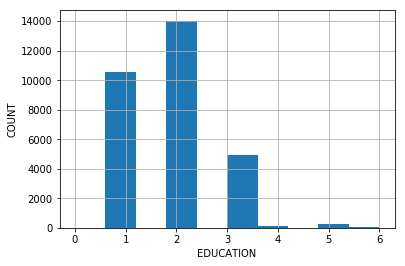

In [21]:
data['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')

Text(0,0.5,'COUNT')

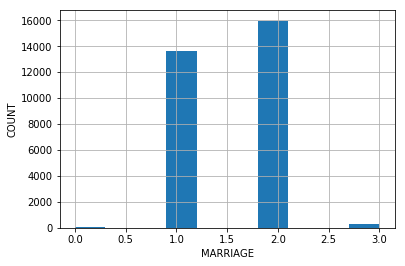

In [22]:
data['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')

C:\Users\arnab saha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


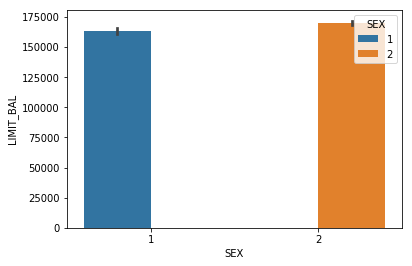

In [23]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=data,hue='SEX')

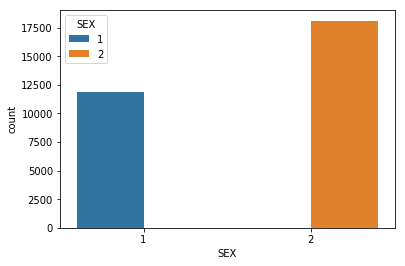

In [24]:
sns.countplot(x='SEX',data=data,hue = 'SEX')

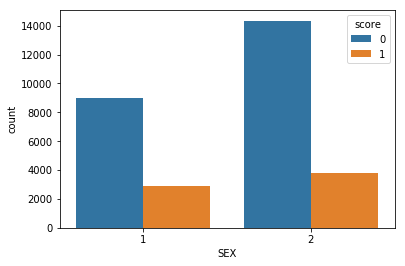

In [25]:
sns.countplot(x='SEX', data=data,hue="score")

From the above plot it is clear that those people who have marital status 1 have less default payment wrt 2 status people


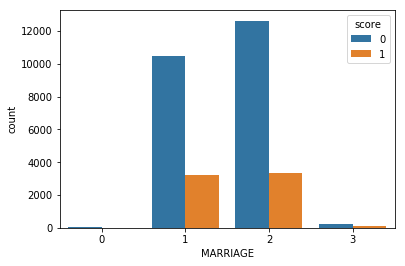

In [26]:
g=sns.countplot(x="MARRIAGE", data=data,hue="score")
print("From the above plot it is clear that those people who have marital status 1 have less default payment wrt 2 status people")

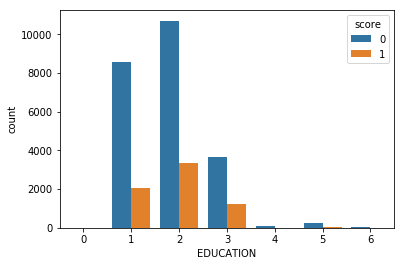

In [27]:
g=sns.countplot(x="EDUCATION", data=data,hue="score")

In [28]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

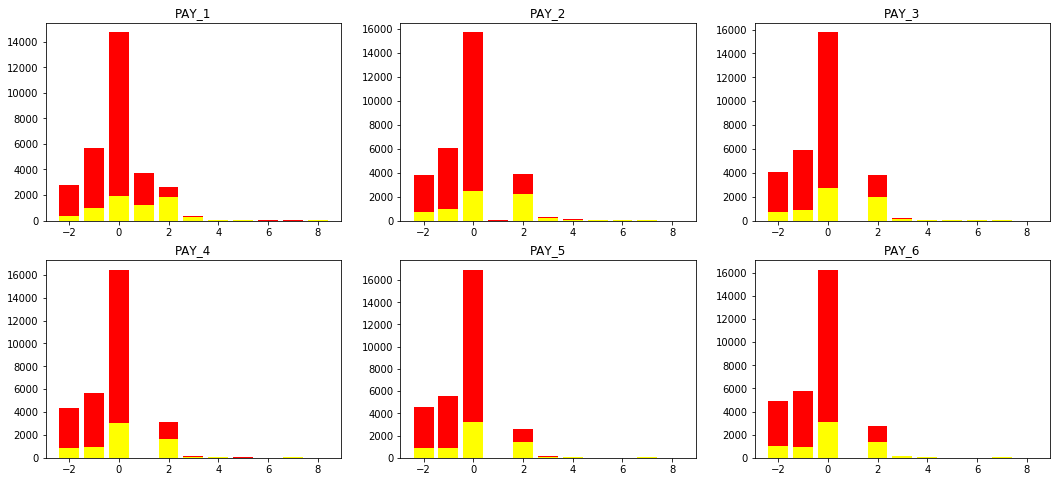

In [29]:
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3
    d  = data[pay_status_columns[i]].value_counts()
    x = data[pay_status_columns[i]][(data['score']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow')
    ax[row,col].set_title(pay_status_columns[i])    
plt.show()

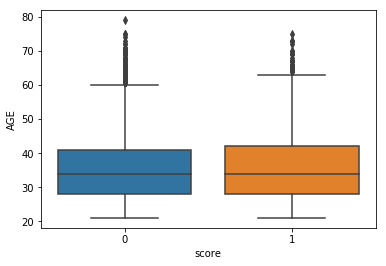

In [30]:
sns.boxplot(x='score',y='AGE',data=data)

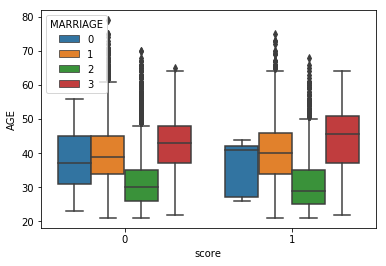

In [31]:
sns.boxplot(x='score',hue='MARRIAGE', y='AGE',data=data)

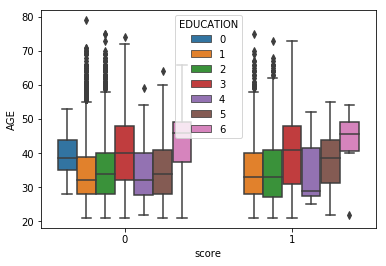

In [32]:
sns.boxplot(x='score',hue='EDUCATION', y='AGE',data=data)

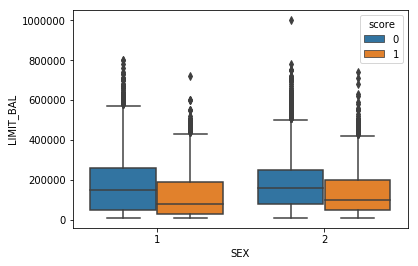

In [33]:
sns.boxplot(x='SEX',hue='score', y='LIMIT_BAL',data=data)

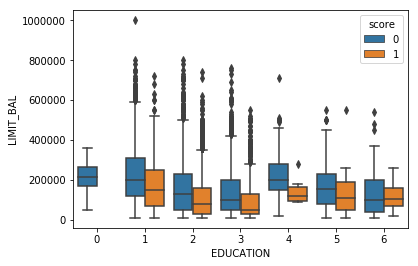

In [34]:
sns.boxplot(x='EDUCATION',hue='score', y='LIMIT_BAL',data=data)

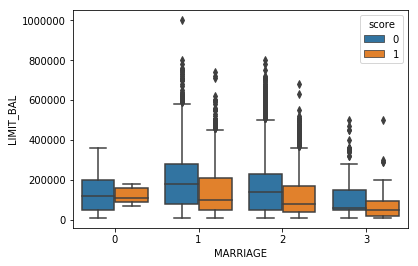

In [35]:
sns.boxplot(x='MARRIAGE',hue='score', y='LIMIT_BAL',data=data)

C:\Users\arnab saha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\arnab saha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


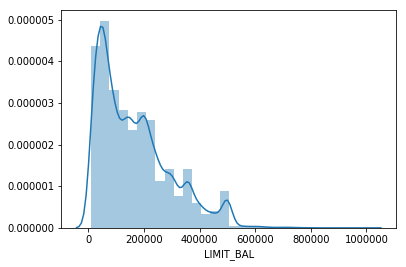

In [36]:
sns.distplot(data['LIMIT_BAL'],bins=30)

In [37]:
"""sns.pairplot(data, vars=data.columns[11:17], kind='scatter',hue= 'score')
sns.pairplot(data, vars=data.columns[17:23],hue = 'score')"""

"sns.pairplot(data, vars=data.columns[11:17], kind='scatter',hue= 'score')\nsns.pairplot(data, vars=data.columns[17:23],hue = 'score')"

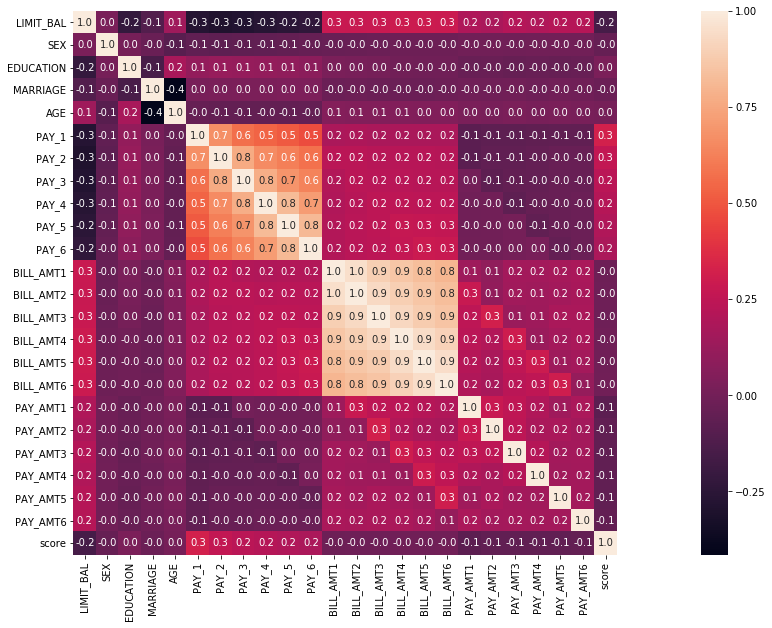

In [38]:
correlation = data.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

In [39]:
"""X = data.drop(['score'],axis=1)
X.corrwith(data['score']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)"""

'X = data.drop([\'score\'],axis=1)\nX.corrwith(data[\'score\']).plot.bar(figsize = (20, 10), title = "Correlation with Default", \n                                        fontsize = 20,rot = 90, grid = True)'

In [40]:
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

C:\Users\arnab saha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
y_pred = logmodel.predict(X_test)

In [42]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

C:\Users\arnab saha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\arnab saha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.777778,0.0,0.0,0.0,0.5


In [43]:
"""error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))"""

'error_rate = []\nfor i in range(1,20):\n    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)\n    knn.fit(X_train,y_train)\n    pred_i = knn.predict(X_test)\n    error_rate.append(np.mean(pred_i != y_test))'

In [44]:
"""plt.figure(figsize=(10,10))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='p',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')"""

"plt.figure(figsize=(10,10))\nplt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='p',\n         markerfacecolor='red', markersize=10)\nplt.title('Error Rate vs. K Value')\nplt.xlabel('K')\nplt.ylabel('Error Rate')"

In [45]:
knn = KNeighborsClassifier(n_neighbors=16)

In [46]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [47]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.778111,0.504274,0.0885,0.150574,0.531821


In [48]:
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

C:\Users\arnab saha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [49]:
y_pred = scv.predict(X_test)

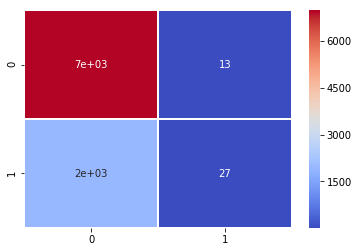

In [50]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [51]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.779333,0.675,0.0135,0.026471,0.505821


In [52]:
modellist = [KNeighborsClassifier(), LogisticRegression()]

In [53]:
for model in modellist:
    modelfit = model.fit(X_train, y_train)
    modelypred = modelfit.predict(X_test)
    print(str(model).split("(")[0] + ": " + str(round(accuracy_score(y_test, modelypred),3)))
    print(confusion_matrix(y_test, model.predict(X_test)))

KNeighborsClassifier: 0.756
[[6428  572]
 [1626  374]]


C:\Users\arnab saha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression: 0.778
[[7000    0]
 [2000    0]]


No handles with labels found to put in legend.


Percentage of Graduate school Default is 19.23476617855456 %
Percentage of University Default is 23.734853884533145 %
Percentage of High school Default is 25.157616432784216 %
Percentage of Others Default is 5.691056910569106 %


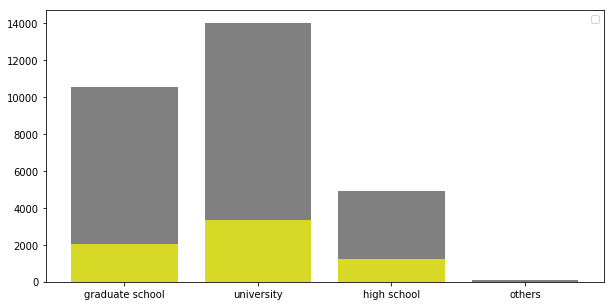

In [54]:
def calculate_percentage (default_count, total_count,label):
    print("Percentage of {} is {} %".format(label,((total_count * 100) / default_count)))

_EDUCATION_RANGE= [1,2,3,4]
plt.figure(figsize=(10,5))
school= data['EDUCATION'][data['EDUCATION']==1].count()
school_default = data['EDUCATION'][(data['EDUCATION']==1)&(data['score'])].count()
university= data['EDUCATION'][data['EDUCATION']==2].count()
university_default = data['EDUCATION'][(data['EDUCATION']==2)&(data['score'])].count()
high_school= data['EDUCATION'][data['EDUCATION']==3].count()
high_school_default = data['EDUCATION'][(data['EDUCATION']==3)&(data['score'])].count()
others= data['EDUCATION'][data['EDUCATION']==4].count()
others_default = data['EDUCATION'][(data['EDUCATION']==4)&(data['score'])].count()
education_total = [school,university,high_school,others]
default_education_total=  [school_default,university_default,high_school_default,others_default] 
plt.bar(_EDUCATION_RANGE , education_total,color='grey')
plt.bar(_EDUCATION_RANGE , default_education_total,color='yellow', alpha = 0.7)
plt.xticks(_EDUCATION_RANGE,['graduate school','university','high school','others'])
calculate_percentage(school,school_default,"Graduate school Default")
calculate_percentage(university,university_default,"University Default")
calculate_percentage(high_school,high_school_default,"High school Default")
calculate_percentage(others,others_default,"Others Default")
plt.legend()
plt.show()

In [55]:
"""print("Gender / Default")
plt.figure(figsize=(10,5))
_GENDER_RANGE= [0,1]
male= data['SEX'][data['SEX']==0].count()
male_default = data['SEX'][(data['SEX']==0)&(data['score']==1)].count()
female=data['SEX'][data['SEX']==1].count()
female_default = data['SEX'][(data['SEX']==1)&(data['score']==1)].count()
gender_total = [male,female]
default_gender_total = [male_default,female_default]
plt.bar(_GENDER_RANGE,gender_total, color='grey')
plt.bar(_GENDER_RANGE,default_gender_total, color='yellow',alpha = 0.7)
plt.xticks([0,1],['Male','Female'])
plt.legend()
plt.show()
calculate_percentage(male,male_default,"Male Default")
calculate_percentage(female,female_default,"Female Default")"""

'print("Gender / Default")\nplt.figure(figsize=(10,5))\n_GENDER_RANGE= [0,1]\nmale= data[\'SEX\'][data[\'SEX\']==0].count()\nmale_default = data[\'SEX\'][(data[\'SEX\']==0)&(data[\'score\']==1)].count()\nfemale=data[\'SEX\'][data[\'SEX\']==1].count()\nfemale_default = data[\'SEX\'][(data[\'SEX\']==1)&(data[\'score\']==1)].count()\ngender_total = [male,female]\ndefault_gender_total = [male_default,female_default]\nplt.bar(_GENDER_RANGE,gender_total, color=\'grey\')\nplt.bar(_GENDER_RANGE,default_gender_total, color=\'yellow\',alpha = 0.7)\nplt.xticks([0,1],[\'Male\',\'Female\'])\nplt.legend()\nplt.show()\ncalculate_percentage(male,male_default,"Male Default")\ncalculate_percentage(female,female_default,"Female Default")'

In [65]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [66]:
clf = DecisionTreeClassifier(random_state=41,max_leaf_nodes=3)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print("Score : {} using {}".format(score*100, 'DecisionTreeClassifier'))

Score : 82.69333333333333 using DecisionTreeClassifier


In [67]:
pca = PCA(n_components = 4)
X25D = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)

[0.61098206 0.29691794 0.03071368 0.01556503]


In [68]:
"""plt.plot(cumsum)"""

'plt.plot(cumsum)'

In [70]:
clf_reg=LogisticRegression()
clf_reg.fit(x_train,y_train)
Y_pred_logr=clf_reg.predict(x_train)
Y_predict_logr=clf_reg.predict(x_test)
print("Score of Logistic Regression Model on train: ","{0:.4f}".format(clf_reg.score(x_train,y_train)))

C:\Users\arnab saha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score of Logistic Regression Model on train:  0.7775


In [71]:
svm_clf=LinearSVC()
svm_clf.fit(x_train,y_train)
Y_train_pred_svm=svm_clf.predict(x_train)
Y_predict_clf=svm_clf.predict(x_test)
print("Score of SVM Regression Model on train: ",svm_clf.score(x_train,y_train))

Score of SVM Regression Model on train:  0.7776


C:\Users\arnab saha\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
